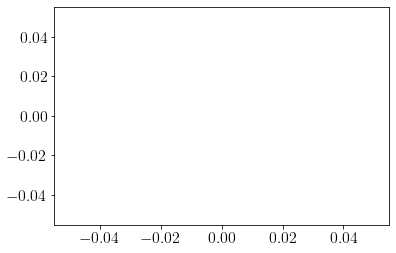

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
import json
from utils import Monopoly
from utils import cbeq, polyeq, term, is_divisible, Number
from matplotlib import pyplot as plt
rng = np.random.default_rng(219)

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

JSON_FILE = "../assets/data/wk11_practice.json"
IMAGE_PATH = "../assets/images/wk11"
probs = []
nprob = 0

In [2]:
# Monopoly basic
df = pd.read_csv("Monopoly_examples.csv")
idx1 = (df['gamma']==0) & (df['eta']==0) & (df['beta']<=1)
idx2 = (df['gamma']>df['delta']) & (df['eta']==0) & (df['beta']<=1)
idx3 = (df['eta']>0) & (df['beta']<=1)
mydf = pd.concat([
    df.loc[idx1].sample(20, random_state=rng),
    df.loc[idx2].sample(20, random_state=rng),
    df.loc[idx3].sample(30, random_state=rng)
])
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    Y, alpha, beta, gamma, delta, eta = params['Y'], params['alpha'], params['beta'], params['gamma'], params['delta'], params['eta']
    prob = Monopoly(params)
    p, Q, Profit = prob.sol['p'], prob.sol['Q'], prob.sol['Profit']
    setup = fr"""
A commodity \(q\) is supplied by a monopolist with cost function: 

$$c(q) = {polyeq('q',[gamma,delta,0.5*eta],[0,1,2])} $$

The monopolist faces a market demand curve given by:

$$Q_d = {polyeq('p',[Number(alpha,beta), Number(-1,beta)],[0,1])} $$
""" 
    setup += fr"""
<p>Calculate the profit maximizing price and quantity. Calculate the maximum profit</p>
"""
    solution = fr"""
<p>\(p = {p:g}\)</p>
<p>\(Q = {Q:g}\)</p>
<p>Profit = \({Profit:g}\)</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

70


In [3]:
# Monopoly with derived demand
df = pd.read_csv("Monopoly_examples.csv")
idx1 = (df['gamma']==0) & (df['eta']==0) 
idx2 = (df['gamma']>df['delta']) & (df['eta']==0) 
idx3 = (df['eta']>0) 
mydf = pd.concat([
    df.loc[idx1].sample(20, random_state=rng),
    df.loc[idx2].sample(20, random_state=rng),
    df.loc[idx3].sample(30, random_state=rng)
])
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    Y, alpha, beta, gamma, delta, eta = params['Y'], params['alpha'], params['beta'], params['gamma'], params['delta'], params['eta']
    prob = Monopoly(params)
    p, Q, Profit, U = prob.sol['p'], prob.sol['Q'], prob.sol['Profit'], prob.sol['U']
    p_eff, Q_eff, Profit_eff, U_eff = prob.sol['p_eff'], prob.sol['Q_eff'], prob.sol['Profit_eff'], prob.sol['U_eff']
    DWL = prob.sol['DWL']
    setup = fr"""
A commodity \(q\) is supplied by a monopolist with cost function: 

$$c(q) = {polyeq('q',[gamma,delta,0.5*eta],[0,1,2])} $$

A representative consumer with income \(Y={Y:g}\) has a utility function over numeraire consumption \(c\) and commodity \(q\) given by:

$$u(c,q) = c + {polyeq('q',[alpha, -0.5*beta],[1,2])} $$
""" 
    setup += fr"""
<p>1. Write down the demand curve faced by the monopolist.</p>
<p>2. Find the profit maximizing price and quantity. Calculate firm profit and consumer utility at the profit-maximizing quantity.</p>
<p>3. What is the efficient price and quantity? Calculate firm profit and consumer utility at the efficient quantity.</p>
<p>4. What is the deadweight loss caused by the monopoly?</p>
"""
    solution = fr"""
<p>1. \(Q_d = {polyeq('p',[Number(alpha,beta), Number(-1,beta)],[0,1])}\)</p>
<p>2. \(p = {p:g}\), \(Q = {Q:g}\), \(\Pi = {Profit:g}\), \(U = {U:g}\)</p>
<p>3. \(p = {p_eff:g}\), \(Q = {Q_eff:g}\), \(\Pi = {Profit_eff:g}\), \(U = {U_eff:g}\)</p>
<p>4. DWL = \({DWL:g}\)</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

140


In [4]:
with open(JSON_FILE, 'w') as f:
    json.dump(probs, f)

In [5]:
with open(JSON_FILE, 'r') as f:
    myprobs = json.load(f)

In [6]:
prob = np.random.choice(myprobs)
display(Latex(prob['setup']))
display(Latex(prob['solution']))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>